<a href="https://colab.research.google.com/github/SabalNiroula/Colab-files/blob/master/tensorflow_linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to linear regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in simple it is predicting a number based on different input features.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Create data to fit and view

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

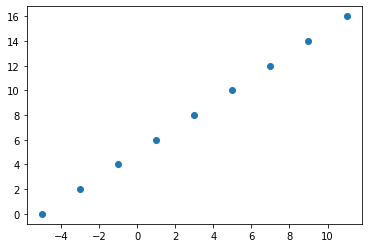

In [ ]:
X = np.array([-5, -3, -1, 1, 3, 5, 7, 9, 11])

Y = X +5

plt.scatter(X, Y)

In [ ]:
#let's make tensors from numpy array
X = tf.constant(X)
y = tf.constant(Y)
X.shape, y.shape

(TensorShape([9]), TensorShape([9]))

# Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden 
layer of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function 
which tells our model how wrong it is ) and optimizer (tells the model how to 
improve the patterns its learning) and evaluation metrix (which we can use to 
interprete the performance of our model)
3. Fitting a model - letting the model try to find patterns between X and y

In [ ]:
# set a random seed
tf.random.set_seed(43)

# creating a model using sequential API
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(1) #
])

# is same as
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

#compiling the model
model.compile(loss = tf.keras.losses.mae, 
    optimizer= tf.keras.optimizers.SGD(),
    metrics= ['mae'])

#3 fit the model
model.fit(tf.expand_dims(X, axis=1),y, epochs=100)
# epoch  refers to the one entire passing of training data through the algorithm

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 11.3075 - mae: 11.3075
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0762 - mae: 11.0762
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8448 - mae: 10.8448
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6262 - mae: 10.6262
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4512 - mae: 10.4512
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2761 - mae: 10.2761
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.1010 - mae: 10.1010
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.9260 - mae: 9.9260
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7509 - mae: 9.7509
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5759 - mae: 9.5759
Epoch 11/100
1/1 [==============================] - 0s 7ms/step 

In [ ]:
print(tf.expand_dims(X, axis=1))


tf.Tensor(
[[-5]
 [-3]
 [-1]
 [ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]], shape=(9, 1), dtype=int64)


In [ ]:
X, y


(<tf.Tensor: shape=(9,), dtype=int64, numpy=array([-5, -3, -1,  1,  3,  5,  7,  9, 11])>,
 <tf.Tensor: shape=(9,), dtype=int64, numpy=array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])>)

In [ ]:
y_pred = model.predict([13])
y_pred

1/1 [==============================] - 0s 145ms/step


array([[19.853323]], dtype=float32)


# Improve our model 
We can improve our model by altering the steps we took to create our model:

1. **Creating a model** - we might want to **add more layers**, and increase
number of hidden units (neurons) within hidden layers, change the activation function.

2. **Compiling a model** - we might change the optimization function or perhaps **learning rate** of the optimization function. 

3. **Fitting the model** - we might want to fit a model for more **epochs** or have more training data to learn from 

In [ ]:
# let's create a model 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.00591),
              metrics=['mae']
)

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 672ms/step - loss: 8.8016 - mae: 8.8016
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5217 - mae: 8.5217
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2408 - mae: 8.2408
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 7.9561 - mae: 7.9561
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 7.7331 - mae: 7.7331
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4180 - mae: 7.4180
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1209 - mae: 7.1209
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8441 - mae: 6.8441
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.5642 - mae: 6.5642
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.2799 - mae: 6.2799
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 5.9910 - mae

In [ ]:
X, y

(<tf.Tensor: shape=(9,), dtype=int64, numpy=array([-5, -3, -1,  1,  3,  5,  7,  9, 11])>,
 <tf.Tensor: shape=(9,), dtype=int64, numpy=array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])>)

In [ ]:
model.predict([100])

1/1 [==============================] - 0s 109ms/step


array([[113.4906]], dtype=float32)

# Evaluating the model 


## Visualizing data
For data to perfrom better we need to have bigger dataset.

In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

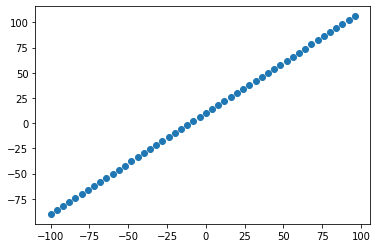

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y )

In [ ]:
# lets split into x_test, X_train and y_test and y_train
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.0059),
              metrics = ['mae'])

model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 47.5166 - mae: 47.5166
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 47.1320 - mae: 47.1320
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 46.7697 - mae: 46.7697
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 46.4098 - mae: 46.4098
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 46.0468 - mae: 46.0468
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 45.6795 - mae: 45.6795
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 45.3177 - mae: 45.3177
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 44.9792 - mae: 44.9792
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 44.6133 - mae: 44.6133
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 44.2412 - mae: 44.2412
Epoch 11/100
2/2 [==============================] - 0s 6

In [ ]:
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
tf.expand_dims(X, axis=1)[0].shape

TensorShape([1])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1, input_shape = (1,),activation = "relu" , name="input-layer") # "1" means 2D array and , represent more 1D inside 2D
], name="Model")

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.0059),
              metrics = ['mae'])

model.fit(tf.expand_dims(X_train, axis=1), y_train, verbose=0, epochs=100)

In [ ]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                100       
                                                                 
 input-layer (Dense)         (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


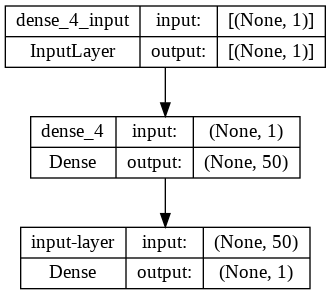

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

#Visualizing our model prediction
often time you will see this as 'y_true' or 'y_test' Vs. 'y_pred'

In [ ]:
# make some prediction
y_pred = model.predict(tf.expand_dims(X_test,axis=1))
y_pred

1/1 [==============================] - 0s 112ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_line(test_x, test_y, train_x, train_y, pred_y):
  
  plt.figure(figsize=(10,8))
  plt.scatter(train_x, train_y, color='b', label="Training_Data")
  plt.scatter(test_x, test_y, color='g', label="Test_Data")
  plt.scatter(test_x, pred_y, color='r', label="Pred_Data")
  plt.legend()

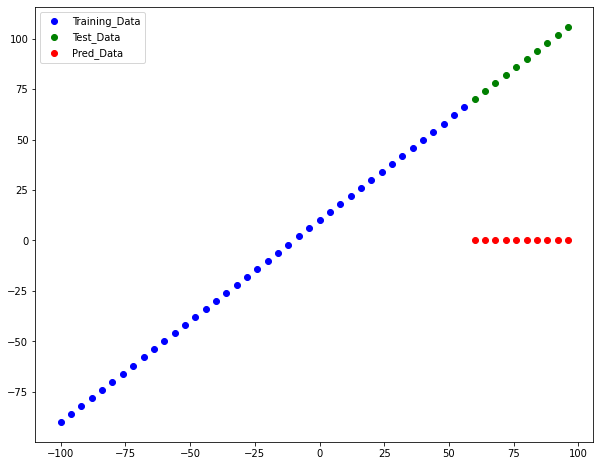

In [ ]:
plot_line(tf.expand_dims(X_test, axis=1), y_test, tf.expand_dims(X_train, axis=1), y_train, y_pred)

## Evaluation metrics
Depending upon the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

One of the two main evaluation metrics in regression problems are:

- MAE - Mean Absolute Error "On average how wrong is each of our model prediction"
- MSE - Mean Square Error "Square the average error"

In [ ]:
# Evaluate the metrics
model.evaluate(tf.expand_dims(X_test, axis=1), y_test)
# In the compile method we have initialized loss to be "mae" and metrics to be "mae"

1/1 [==============================] - 0s 214ms/step - loss: 88.0000 - mae: 88.0000


[88.0, 88.0]

In [ ]:
# Let's calculate the mean square error
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([88., 88., 88., 88., 88., 88., 88., 88., 88., 88.], dtype=float32)>

In [ ]:
# It is giving that output because the spape of Y_test and y_pred are not equal

print(y_pred.shape, y_test.shape) # yes, what we did claim is true
print(y_pred, y_test) # Also y_pred is array where as y_test is a tensor so we need to convert it


(10, 1) (10,)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


In [ ]:
y_pred = tf.squeeze(y_pred)
print(y_pred)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


In [ ]:
# Now if we try that same thing, this will produce output we want i.e. 6.4
print(tf.metrics.mean_absolute_error(y_test, y_pred) ) # OR
print(tf.keras.losses.mae(y_test, y_pred))

tf.Tensor(88.0, shape=(), dtype=float32)
tf.Tensor(88.0, shape=(), dtype=float32)


In [ ]:
# now let's calculate mean square error
print(tf.metrics.mean_squared_error(y_test, y_pred))
print(tf.keras.losses.mse(y_test, y_pred))

tf.Tensor(7876.0, shape=(), dtype=float32)
tf.Tensor(7876.0, shape=(), dtype=float32)


In [ ]:
# Make a function for mse and mae
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(y_pred)))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_test, tf.squeeze(tf.constant(y_pred)))

In [ ]:
X_train = tf.expand_dims(X_train, axis=1)
X_test = tf.expand_dims(X_test, axis=1)
print(X_train)

tf.Tensor(
[[-100]
 [ -96]
 [ -92]
 [ -88]
 [ -84]
 [ -80]
 [ -76]
 [ -72]
 [ -68]
 [ -64]
 [ -60]
 [ -56]
 [ -52]
 [ -48]
 [ -44]
 [ -40]
 [ -36]
 [ -32]
 [ -28]
 [ -24]
 [ -20]
 [ -16]
 [ -12]
 [  -8]
 [  -4]
 [   0]
 [   4]
 [   8]
 [  12]
 [  16]
 [  20]
 [  24]
 [  28]
 [  32]
 [  36]
 [  40]
 [  44]
 [  48]
 [  52]
 [  56]], shape=(40, 1), dtype=int32)


## Running an Experiment on our model

`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ....`

1. Get more Data : Get more example for your model to train on (more opportunities for model to learn pattern ore relationship between features and labels )

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more models hidden units in each layer.

3. Train for longer - give your model more of a chance to find pattern in data. 


## let's do three modelling experiments:

1. `model-1` trained for 1 layers for 100 epochs
2. `model-2` trained for 2 layers for 100 epochs
3. `model-2` trained for 2 layers for 500 epochs

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_1.compile(loss= tf.keras.losses.mae, 
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 28.6124 - mae: 28.6124
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 28.6495 - mae: 28.6495
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 28.4689 - mae: 28.4689
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 28.3177 - mae: 28.3177
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 28.4009 - mae: 28.4009
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 28.4099 - mae: 28.4099
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 28.2860 - mae: 28.2860
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 28.3756 - mae: 28.3756
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 28.2899 - mae: 28.2899
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 28.3179 - mae: 28.3179
Epoch 11/100
2/2 [==============================] - 0s 10ms

In [ ]:
y_pred_1 = model_1.predict(X_test)
print("MAE_1:",mae(y_test, y_pred),"\nMSE_1:", mse(y_test, y_pred))

1/1 [==============================] - 0s 32ms/step
MAE_1: tf.Tensor(88.0, shape=(), dtype=float32) 
MSE_1: tf.Tensor(7876.0, shape=(), dtype=float32)


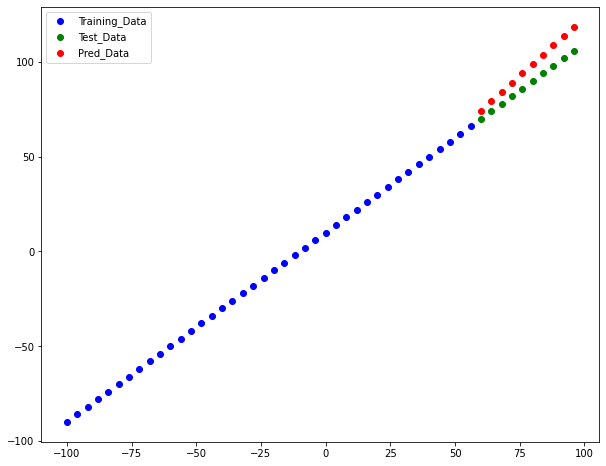

In [ ]:
plot_line(X_test, y_test, X_train, y_train, y_pred_1)

In [ ]:
print(y_test, y_pred)

tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32) tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


# Model 2 
* 2 dense layer and 100 epochs

In [ ]:
tf.random.set_seed(423)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mse'])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 56.3431 - mse: 4797.4395
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 18.0191 - mse: 511.4672
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 22.6010 - mse: 676.3180
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 37.1468 - mse: 1983.4371
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4782 - mse: 121.3004
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 16.3541 - mse: 413.1033
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 13.9916 - mse: 234.1425
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 24.4502 - mse: 830.5462
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0207 - mse: 134.3600
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 24.3983 - mse: 908.2618
Epoch 11/100
2/2 [=============================

In [ ]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 38ms/step


array([[20.560476],
       [21.846802],
       [23.13313 ],
       [24.419456],
       [25.705782],
       [26.992107],
       [28.278435],
       [29.56476 ],
       [30.851088],
       [32.137417]], dtype=float32)

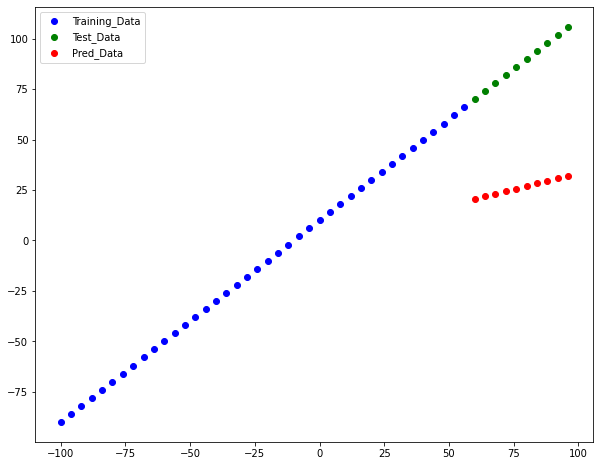

In [ ]:
plot_line(X_test, y_test, X_train, y_train, y_pred_2)

In [ ]:
print("MAE_2:",mae(y_test, y_pred_2),"\nMSE_2:", mse(y_test, y_pred_2))

MAE_2: tf.Tensor(61.651054, shape=(), dtype=float32) 
MSE_2: tf.Tensor(3861.6055, shape=(), dtype=float32)


## Model 3
* 2 dense layer, 500 epochs

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mse'])
model_3.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mse: 1084.1481
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 40.4763 - mse: 2586.0081
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mse: 1094.4379
Epoch 11/500
2/2 [========================

In [ ]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 0s 39ms/step


array([[15.854739],
       [16.617327],
       [17.379913],
       [18.142502],
       [18.905088],
       [19.667677],
       [20.430264],
       [21.19285 ],
       [21.955437],
       [22.718025]], dtype=float32)

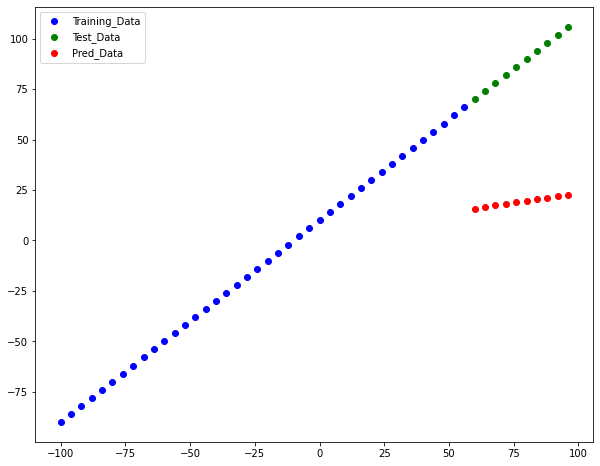

In [ ]:
plot_line(X_test, y_test, X_train, y_train, y_pred_3)

In [ ]:
print("MAE_2:",mae(y_test, y_pred_3),"\nMSE_2:", mse(y_test, y_pred_3))

MAE_2: tf.Tensor(68.71362, shape=(), dtype=float32) 
MSE_2: tf.Tensor(4808.0283, shape=(), dtype=float32)


## Saving our model
saving our model allows us to use them outside of Google colab (or whereever they can be used )
There are two main format we can save our model:
1. The SavedModel format
2. The HDF5 format 

In [ ]:
# Saving model using SavedModel Format
# model_1.save("model_1")

In [ ]:
# Saving the model using hdf5 model(for larger dataset model)
# model_1.save('model_1_trained.h5')

In [ ]:
# loading the saved model
load_model1 = tf.keras.models.load_model("model_1")
load_model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary() # yes, it is the same 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_h5 = tf.keras.models.load_model("model_1_trained.h5")
loaded_h5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Downloading files
you can either downlod using 3dot key or save from code using below:

In [ ]:
from google.colab import files
# files.download("model_1_trained.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# A Practice on larger dataset


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
284,52,female,31.20,0,no,southwest,9625.9200
1233,58,male,23.30,0,no,southwest,11345.5190
251,63,female,32.20,2,yes,southwest,47305.3050
1160,43,female,34.58,1,no,northwest,7727.2532
1085,39,female,18.30,5,yes,southwest,19023.2600


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# let's one hot encode into numerical columns
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Or you can manually do 
# first of all let's change gender 0-> female and 1-> male
data['sex'] = data['sex'].replace({'female': 0, 'male': 1})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
data['smoker'] = data.smoker.replace({"yes":1, "no":0})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
# now for region we can use get_dummies() for one hot encoding in "region" column
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [ ]:
# Create feature and label
# Here "charges" is label and other columns are feature
y = data['charges'] 
X = data.drop(columns= ['charges'], axis=1)

In [ ]:
print(X.head())
print("_ " * 30)
print(y) 

   age  sex     bmi  children  smoker  region_northeast  region_northwest  \
0   19    0  27.900         0       1                 0                 0   
1   18    1  33.770         1       0                 0                 0   
2   28    1  33.000         3       0                 0                 0   
3   33    1  22.705         0       0                 0                 1   
4   32    1  28.880         0       0                 0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, L

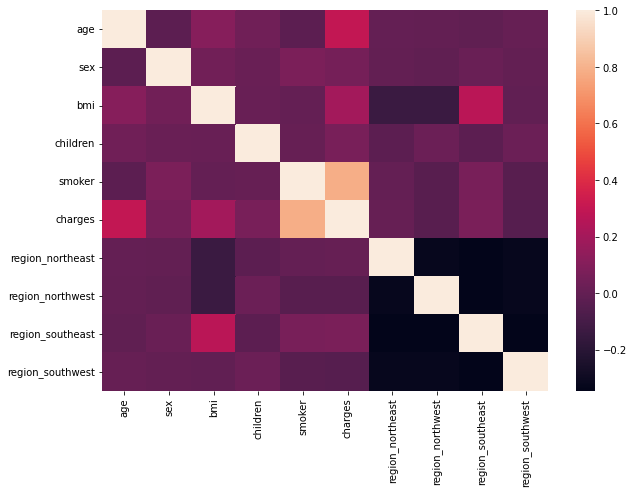

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(data.corr())

In [ ]:
# Create train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42 )

In [ ]:
len(X), len(X_train), len(X_test)


560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [ ]:
# build a neural network from it;

tf.random.set_seed(42)

new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

new_model.compile(loss = tf.keras.losses.mae,
                  optimizer= tf.keras.optimizers.SGD(),
                  metrics=['mse'])

new_model.fit(X_train, (y_train), verbose=1, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 8653.1465 - mse: 189404512.0000
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 7887.8345 - mse: 168245280.0000
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 7534.6533 - mse: 164690448.0000
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 7721.3418 - mse: 169289408.0000
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 7764.1509 - mse: 166593024.0000
Epoch 6/200
34/34 [==============================] - 0s 7ms/step - loss: 7552.1641 - mse: 163926736.0000
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 7604.3472 - mse: 162240208.0000
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7744.8833 - mse: 163472224.0000
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7612.5034 - mse: 164386128.0000
Epoch 10/200
34/34 [==============================] - 0

In [ ]:
y_pred = new_model.predict(X_test)
y_pred.shape, y_test.shape

9/9 [==============================] - 0s 2ms/step


((268, 1), (268,))

In [ ]:
tf.metrics.mean_absolute_error(y_test, y_pred.squeeze())

<tf.Tensor: shape=(), dtype=float32, numpy=6426.861>

In [ ]:
new_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 6426.8608 - mse: 117808056.0000


[6426.86083984375, 117808056.0]

In [ ]:
# build a neural network from it;

tf.random.set_seed(42)

new_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

new_model_2.compile(loss = tf.keras.losses.mae,
                  optimizer= tf.keras.optimizers.SGD(),
                  metrics=['mse'])

history2= new_model_2.fit(X_train, y_train, verbose=0, epochs=500)

In [ ]:
new_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4849.3828 - mse: 89553488.0000


[4849.3828125, 89553488.0]

In [ ]:
# Build a neural network from it;

tf.random.set_seed(42)

new_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

new_model_3.compile(loss = tf.keras.losses.mae,
                  optimizer= tf.keras.optimizers.Adam(),
                  metrics=['mse'])

new_model_3.fit(X_train, y_train, verbose=0, epochs=500)

In [ ]:
new_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 12968.3174 - mse: 323425984.0000


[12968.3173828125, 323425984.0]

In [ ]:
# training for 200 epochs 

tf.random.set_seed(42)

new_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

new_model_4.compile(loss = tf.keras.losses.mae,
                  optimizer= tf.keras.optimizers.Adam(),
                  metrics=['mse'])

history = new_model_4.fit(X_train, y_train, verbose=1, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 13346.0908 - mse: 322451776.0000
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13346.0889 - mse: 322451744.0000
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13346.0908 - mse: 322451680.0000
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13346.0898 - mse: 322451712.0000
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13346.0898 - mse: 322451712.0000
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13346.0898 - mse: 322451776.0000
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 13346.0898 - mse: 322451744.0000
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 13346.0928 - mse: 322451712.0000
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 13346.0918 - mse: 322451680.0000
Epoch 10/200
34/34 [==========================

Text(0.5, 0, 'epochs')

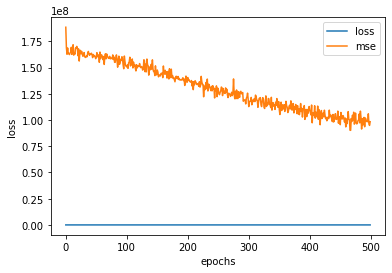

In [ ]:
# plot history also called as loss function or training curve

pd.DataFrame(history2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## How long should I train for ?
you have earlystopping call back in tensorflow which stops when the model stops progressing.

# Preprosessing data (Standardization and Normalization)
Neural networks tend to perform better when they are standardized or normalized
If you are not sure you can experiment to see which fits best

In [ ]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
1112,48,female,25.850,3,yes,southeast,24180.93350
508,24,female,25.270,0,no,northeast,3044.21330
818,47,female,26.125,1,yes,northeast,23401.30575
652,48,female,31.130,0,no,southeast,8280.62270
908,63,male,39.800,3,no,southwest,15170.06900


In [ ]:
X = data.drop(columns=['charges'], axis=1)
y = data['charges']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

> **make_column_transformer** is a function in the **sklearn.compose** module of 
the scikit-learn library in Python that allows you to apply different preprocessing or feature extraction techniques to different columns of a data set. It creates a transformer object that can be used to transform a data set using the specified techniques.



In [ ]:
numeric_feats = ["age", "bmi", "children"]  # apply minmax scaling
categorical_feats = ["region", "sex", "smoker",]  # apply one-hot encoding
passthrough_feats = ["charges"]  # do not apply any transformation
drop_feats = []  # do not include these features in modeling

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (MinMaxScaler(), numeric_feats),
    (OneHotEncoder(handle_unknown='ignore'), categorical_feats),
)
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['region', 'sex', 'smoker'])])

In [ ]:
# Fit the column transformer on the training data
ct.fit(X_train)

# Transform the training and test data sets using the fitted column transformer
X_train_transformed = ct.transform(X_train)
X_test_transformed = ct.transform(X_test)


In [ ]:
print(X_train.iloc[0])
print(X_train_transformed[0])

age                46
sex            female
bmi             19.95
children            2
smoker             no
region      northwest
Name: 560, dtype: object
[0.60869565 0.10734463 0.4        0.         1.         0.
 0.         1.         0.         1.         0.        ]


In [ ]:
X_train.shape, X_train_transformed.shape

((1070, 6), (1070, 11))

## Now, we can build neural networks to with it

In [ ]:
# Building neural network with it

tf.random.set_seed(42)

#create a model

improv_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
improv_model.compile(loss = tf.keras.losses.mae,
                  optimizer= tf.keras.optimizers.Adam(),
                  metrics=['mse'])

#fit the training data
history = improv_model.fit(X_train_transformed, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 3s 4ms/step - loss: 13342.8145 - mse: 322359936.0000
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13334.0645 - mse: 322120352.0000
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13313.4805 - mse: 321557728.0000
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13270.6709 - mse: 320392288.0000
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13194.2451 - mse: 318342080.0000
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13072.8145 - mse: 315075872.0000
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 12896.0371 - mse: 310393824.0000
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 12653.7812 - mse: 304098912.0000
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 12335.8086 - mse: 295958144.0000
Epoch 10/200
34/34 [==========================

In [ ]:
# evaluate the model
improv_model.evaluate(X_test_transformed, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.9648 - mse: 41837200.0000


[3169.96484375, 41837200.0]

Text(0.5, 0, 'epochs')

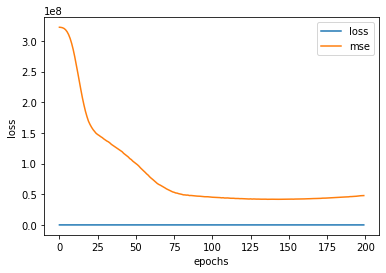

In [ ]:
# plot history also called as loss function or training curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")